In [1017]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Loading Heart Dataset

In [1018]:
df_heart = pd.read_csv('heart_disease_missing.csv')
df_heart.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.035667,1
127,51,0,2,119.967348,294.961557,0,0.0,157.077183,0,0.458861,2.0,0,1.984220,1
158,54,1,0,139.939931,NaN,0,1.0,159.971291,0,1.108075,2.0,0,1.918623,1
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
185,66,0,2,146.101645,277.929051,0,0.0,151.955791,0,-0.080391,1.0,1,1.841225,1
87,55,0,0,179.976042,327.104626,0,2.0,116.888054,1,3.387354,1.0,0,1.863855,0
96,68,1,2,117.869131,276.905655,0,1.0,151.025569,0,0.855891,2.0,1,3.090707,1
59,66,1,1,159.944290,246.175460,0,1.0,119.985560,1,0.031711,1.0,3,0.966887,0
70,65,1,0,109.903691,248.084408,0,0.0,157.905798,0,0.540521,2.0,2,0.962331,0
100,54,1,1,192.020200,283.024208,0,0.0,195.118927,0,-0.113872,2.0,1,2.829133,0


In [1019]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


# Feature descriptions
### Below is the group of features presents in the dataset segregated by their type (numerical, categorical, ordinal, binary)
#### Binary
###### sex (0 = female; 1 = male)
###### fbs: Fasting blood sugar > 120 mg/dl
###### exang: Exercise induced angina (0 = no; 1 = yes)
#### Categorical
###### cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
###### restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
###### slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
###### thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)
#### Ordinal
###### ca: number of major vessels (0-3) colored by flourosopy
#### Numeric
###### age
###### oldpeak: ST depression induced by exercise relative to rest
###### trestbps: Resting blood pressure
###### chol: Serum cholestoral in mg/dl
###### thalach: Maximum heart rate achieved during thalium stress test
#### Target
###### target: 1 = heart disease; 0 = no heart disease

In [1020]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

In [1021]:
# simple numeric encoding the categorical variables for easy data exploration
df_heart.cp = df_heart.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
df_heart.restecg = df_heart.restecg.replace({0:'LV hyper', 1:'Normal', 2:'ST-T wave'})
df_heart.slope = df_heart.slope.replace({0:'down', 1:'up', 2:'flat'})
df_heart.thal = df_heart.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Revers.'})

In [1022]:
df_heart.describe() #Numerical data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target
count,212.000000,212.000000,205.000000,202.000000,212.000000,208.000000,212.000000,200.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,131.784610,244.133256,0.132075,149.647978,0.344340,1.113106,0.731132,2.349112,0.542453
std,9.145339,0.464130,18.057222,46.444257,0.339374,22.076206,0.476277,1.255908,1.038762,0.602117,0.499374
min,29.000000,0.000000,93.944184,126.085811,0.000000,88.032613,0.000000,-0.185668,0.000000,0.858554,0.000000
25%,47.000000,0.000000,119.968114,211.969594,0.000000,135.946808,0.000000,0.050778,0.000000,1.949795,0.000000
50%,55.000000,1.000000,130.010256,241.467023,0.000000,151.939216,0.000000,0.726060,0.000000,2.078759,1.000000
75%,61.000000,1.000000,139.965470,272.484222,0.000000,165.260092,1.000000,1.816733,1.000000,2.970842,1.000000
max,77.000000,1.000000,192.020200,406.932689,1.000000,202.138041,1.000000,6.157114,4.000000,3.277466,1.000000


In [1023]:
df_heart.describe(include=['O'])   #  CATEGORICAL DATA

,cp,restecg,slope
count,212,207,210
unique,4,3,3
top,Asympt.,Normal,flat
freq,101,108,104


###### Observations: 25% of the samples are of 61 years or older people; Over 50% of the people in the sample data have cholestrol level up to 240

# Preprocessing / cleaning the Heart Disease data set

In [1024]:
#Thal values should be categorical but they are in decimals (float) - correcting them
decimals = 0    
df_heart['thal'] = df_heart['thal'].apply(lambda x: round(x, decimals))
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,Non,140.102822,197.105970,0,ST-T wave,115.952071,0,1.284822,up,0,2.0,1
1,43,0,Asympt.,132.079599,341.049462,1,LV hyper,135.970028,1,3.110483,up,0,3.0,0
2,47,1,Non,107.899290,242.822816,0,Normal,152.210039,0,-0.023723,flat,0,2.0,0
3,51,1,Non,99.934001,NaN,0,Normal,143.049207,1,1.195082,up,0,2.0,1
4,57,1,Asympt.,110.103508,334.952353,0,Normal,143.099327,1,3.082052,up,1,3.0,0


In [1025]:
#checking for data character errors 
df_heart['ca'].unique()

array([0, 1, 2, 3, 4])

In [1026]:
#now, our description suggests that 'ca' values should be 0-3; thus, checking for rows for 'ca' value as '4'
df_heart[df_heart['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
55,38,1,Non,138.127886,175.063869,0,Normal,172.906918,0,0.185054,flat,4,2.0,1
82,43,1,Asympt.,131.825380,246.955104,1,LV hyper,142.974825,1,0.079109,up,4,3.0,0
103,38,1,Non,138.127030,174.925633,0,Normal,173.028229,0,0.038206,flat,4,2.0,1
128,52,1,Non,137.977233,222.937493,0,Normal,169.090939,0,0.017090,flat,4,2.0,1


In [1027]:
#changing the 'ca' value 4 to NaN
df_heart.loc[df_heart['ca']==4, 'ca'] = np.NaN

In [1028]:
df_heart['ca'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [1029]:
#checking for errors in thal values
df_heart.thal.value_counts()

2.0    112
3.0     87
1.0     12
Name: thal, dtype: int64

In [1030]:
#checking for null values
df_heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           4
thal         1
target       0
dtype: int64

In [1031]:
df_heart.shape

(212, 14)

In [1032]:
#dropping rows that have all values missing
df_heart.dropna(how='all').shape

(212, 14)

In [1033]:
#dropping rows that have all of these values missing: trestbps, chol, restecg, thalach, oldpeak, slope and thal
df_heart.dropna(subset=['trestbps', 'chol','restecg','thalach' , 'oldpeak', 'slope', 'thal' ], how='all').shape

(212, 14)

In [1034]:
#filling the missing values for categorical features {'restecg', 'slope', 'thal'}
#Replacing the missing values for these categorical features by the Mode of each feature grouped by the target
df_heart_clean = df_heart.copy(deep=True)
df_heart_clean['restecg'] = df_heart.groupby('target')['restecg'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_heart_clean['slope'] = df_heart.groupby('target')['slope'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_heart_clean['ca'] = df_heart.groupby('target')['ca'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_heart_clean['thal'] = df_heart.groupby('target')['thal'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [1035]:
#filling the missing values for numerical features {'trestbps' ,'chol', 'thalach' , 'oldpeak'}
#Replacing the missing values for these numerical features by the Mean of each feature grouped by the target
df_heart_clean['trestbps'] = df_heart.groupby('target')['trestbps'].transform(lambda x: x.fillna(x.mean()))
df_heart_clean['chol'] = df_heart.groupby('target')['chol'].transform(lambda x: x.fillna(x.mean()))
df_heart_clean['thalach'] = df_heart.groupby('target')['thalach'].transform(lambda x: x.fillna(x.mean()))
df_heart_clean['oldpeak'] = df_heart.groupby('target')['oldpeak'].transform(lambda x: x.fillna(x.mean()))

In [1036]:
df_heart_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1037]:
#Checking for duplicate rows
duplicated = df_heart_clean.duplicated().sum()
if duplicated:
    print('Duplicates in the Heart Disease dataset are: {}'.format(duplicated))
else:
    print('Dataset does not contain any duplicate values.')

Dataset does not contain any duplicate values.


In [1038]:
df_heart_clean.shape

(212, 14)

In [1039]:
df_heart_clean.describe() #numerical

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.311321,0.688679,131.822226,244.148518,0.132075,149.721215,0.344340,1.098908,0.655660,2.353774,0.542453
std,9.145339,0.464130,17.759851,45.337268,0.339374,21.899699,0.476277,1.226718,0.938546,0.586042,0.499374
min,29.000000,0.000000,93.944184,126.085811,0.000000,88.032613,0.000000,-0.185668,0.000000,1.000000,0.000000
25%,47.000000,0.000000,119.987220,212.793680,0.000000,136.746670,0.000000,0.083715,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.015117,241.467023,0.000000,151.956198,0.000000,0.676122,0.000000,2.000000,1.000000
75%,61.000000,1.000000,139.959811,269.275502,0.000000,164.991594,1.000000,1.724273,1.000000,3.000000,1.000000
max,77.000000,1.000000,192.020200,406.932689,1.000000,202.138041,1.000000,6.157114,3.000000,3.000000,1.000000


In [1040]:
df_heart_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    object 
 3   trestbps  212 non-null    float64
 4   chol      212 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    object 
 7   thalach   212 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    object 
 11  ca        212 non-null    float64
 12  thal      212 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 23.3+ KB


In [1041]:
# Replacing categorical coded values with integers (0,1,2..) for evaluating the correlation matrix
df_heart_corr = df_heart_clean.copy(deep=True)
df_heart_corr.cp = df_heart_clean.cp.replace({'Asympt.':0,'Atypical':1,'Non':2, 'Typical':3})
df_heart_corr.restecg = df_heart_clean.restecg.replace({'LV hyper': 0, 'Normal': 1, 'ST-T wave':2})
df_heart_corr.slope = df_heart_clean.slope.replace({'down': 0, 'up':1, 'flat':2})
df_heart_corr.thal = df_heart_clean.thal.replace({'NA':0,'Fixed':1, 'Normal':2, 'Revers.':3})

In [1042]:
df_heart_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    float64
 4   chol      212 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    float64
 12  thal      212 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 23.3 KB


# Normalization of Heart Disease Data

In [27]:
# Creating a copy of Heart disease dataframe for normalization
nzd_heart_data = df_heart_corr.copy(deep=True)

In [28]:
#calculating min-max normalized values for each attribute (Numerical attributes)

nzd_heart_data['MinMaxAge'] = (nzd_heart_data.age - nzd_heart_data.age.min())/(nzd_heart_data.age.max() - nzd_heart_data.age.min())
nzd_heart_data['MinMaxSex'] = (nzd_heart_data.sex - nzd_heart_data.sex.min())/(nzd_heart_data.sex.max() - nzd_heart_data.sex.min())
nzd_heart_data['MinMaxTrestbps'] = (nzd_heart_data.trestbps - nzd_heart_data.trestbps.min())/(nzd_heart_data.trestbps.max() - nzd_heart_data.trestbps.min())
nzd_heart_data['MinMaxChol'] = (nzd_heart_data.chol - nzd_heart_data.chol.min())/(nzd_heart_data.chol.max() - nzd_heart_data.chol.min())
nzd_heart_data['MinMaxThalach'] = (nzd_heart_data.thalach - nzd_heart_data.thalach.min())/(nzd_heart_data.thalach.max() - nzd_heart_data.thalach.min())
nzd_heart_data['MinMaxOldpeak'] = (nzd_heart_data.oldpeak - nzd_heart_data.oldpeak.min())/(nzd_heart_data.oldpeak.max() - nzd_heart_data.oldpeak.min())
nzd_heart_data['ZScoreAge'] = (nzd_heart_data.age - nzd_heart_data.age.mean())/nzd_heart_data.age.std()
nzd_heart_data['ZScoreSex'] = (nzd_heart_data.sex - nzd_heart_data.sex.mean())/nzd_heart_data.sex.std()
nzd_heart_data['ZScoreTrestbps'] = (nzd_heart_data.trestbps - nzd_heart_data.trestbps.mean())/nzd_heart_data.trestbps.std()
nzd_heart_data['ZScoreChol'] = (nzd_heart_data.chol - nzd_heart_data.chol.mean())/nzd_heart_data.chol.std()
nzd_heart_data['ZScoreThalach'] = (nzd_heart_data.thalach - nzd_heart_data.thalach.mean())/nzd_heart_data.thalach.std()
nzd_heart_data['ZScoreOldpeak'] = (nzd_heart_data.oldpeak - nzd_heart_data.oldpeak.mean())/nzd_heart_data.oldpeak.std()

nzd_heart_data





,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,MinMaxTrestbps,MinMaxChol,MinMaxThalach,MinMaxOldpeak,ZScoreAge,ZScoreSex,ZScoreTrestbps,ZScoreChol,ZScoreThalach,ZScoreOldpeak
0,76,0,2,140.102822,197.105970,0,2,115.952071,0,1.284822,...,0.470641,0.252879,0.244681,0.231837,2.371556,-1.483808,0.466254,-1.037613,-1.541991,0.151554
1,43,0,0,132.079599,341.049462,1,0,135.970028,1,3.110483,...,0.388835,0.765412,0.420115,0.519670,-1.236840,-1.483808,0.014492,2.137335,-0.627917,1.639802
2,47,1,2,107.899290,242.822816,0,1,152.210039,0,-0.023723,...,0.142289,0.415661,0.562440,0.025532,-0.799459,0.670763,-1.347024,-0.029241,0.113647,-0.915150
3,51,1,2,99.934001,240.825764,0,1,143.049207,1,1.195082,...,0.061073,0.408550,0.482156,0.217688,-0.362077,0.670763,-1.795523,-0.073290,-0.304662,0.078400
4,57,1,0,110.103508,334.952353,0,1,143.099327,1,3.082052,...,0.164763,0.743703,0.482595,0.515187,0.293995,0.670763,-1.222911,2.002852,-0.302373,1.616626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,134.149785,256.189595,1,0,141.981335,1,0.606726,...,0.409943,0.463255,0.472797,0.124928,0.184649,0.670763,0.131057,0.265589,-0.353424,-0.401218
208,57,0,0,127.981407,302.985611,0,0,158.992132,0,0.577227,...,0.347049,0.629880,0.621877,0.120278,0.293995,-1.483808,-0.216264,1.297764,0.423335,-0.425265
209,54,1,2,150.188534,232.117551,0,0,164.977674,0,1.715230,...,0.573477,0.377543,0.674333,0.299695,-0.034041,0.670763,1.034148,-0.265366,0.696652,0.502416
210,41,1,2,129.918793,214.008059,0,0,167.851493,0,1.992138,...,0.366803,0.313061,0.699519,0.343352,-1.455531,0.670763,-0.107176,-0.664805,0.827878,0.728147


### One-hot encoding

In [29]:
#Segregating categorical and numeric data attributes
CatCol = []
NumCol = []
for i in df_heart_corr.columns:
    if (len(df_heart_corr[i].unique())) > 5:
        NumCol.append(i)
    else:
        CatCol.append(i)
    print('unique values:  {}\t{}'.format(len(df_heart_corr[i].unique()),i))
CatCol.remove('target')
CATdata = df_heart_corr[CatCol]
NumCol.append('target') #adding target to the Numeric column
NUMdata = df_heart_corr[NumCol]

print(NumCol)
print(CatCol)

unique values:  41	age
unique values:  2	sex
unique values:  4	cp
unique values:  207	trestbps
unique values:  204	chol
unique values:  2	fbs
unique values:  3	restecg
unique values:  210	thalach
unique values:  2	exang
unique values:  202	oldpeak
unique values:  3	slope
unique values:  4	ca
unique values:  3	thal
unique values:  2	target
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [30]:
#  one hot encoding works on type 'object'
encoded_data = df_heart_corr.copy(deep=True)
for i in CatCol:
    encoded_data[i] = encoded_data[i].astype(object)
    
df_OHE = encoded_data[CatCol]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(encoded_data[NumCol])  #  add numeric columns

df_OHE.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,ca_3.0,thal_1.0,thal_2.0,thal_3.0,age,trestbps,chol,thalach,oldpeak,target
0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,76,140.102822,197.105970,115.952071,1.284822,1
1,1,0,1,0,0,0,0,1,1,0,...,0,0,0,1,43,132.079599,341.049462,135.970028,3.110483,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,47,107.899290,242.822816,152.210039,-0.023723,0
3,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,51,99.934001,240.825764,143.049207,1.195082,1
4,0,1,1,0,0,0,1,0,0,1,...,0,0,0,1,57,110.103508,334.952353,143.099327,3.082052,0


In [31]:
# Normalizing the data

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.97916667, 0.47064145,
        0.25287858, 0.24468125, 0.23183667, 1.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.29166667, 0.38883528,
        0.76541228, 0.42011512, 0.51966953, 0.        ]])

In [32]:
#dataframe with the One Hot Encoding & normalized data
df_nzd = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df_nzd.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,ca_3.0,thal_1.0,thal_2.0,thal_3.0,age,trestbps,chol,thalach,oldpeak,target
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.979167,0.470641,0.252879,0.244681,0.231837,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.291667,0.388835,0.765412,0.420115,0.519670,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.375000,0.142289,0.415661,0.562440,0.025532,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.458333,0.061073,0.408550,0.482156,0.217688,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.583333,0.164763,0.743703,0.482595,0.515187,0.0


# Exploratory data analysis for Heart disease data

### Histograms

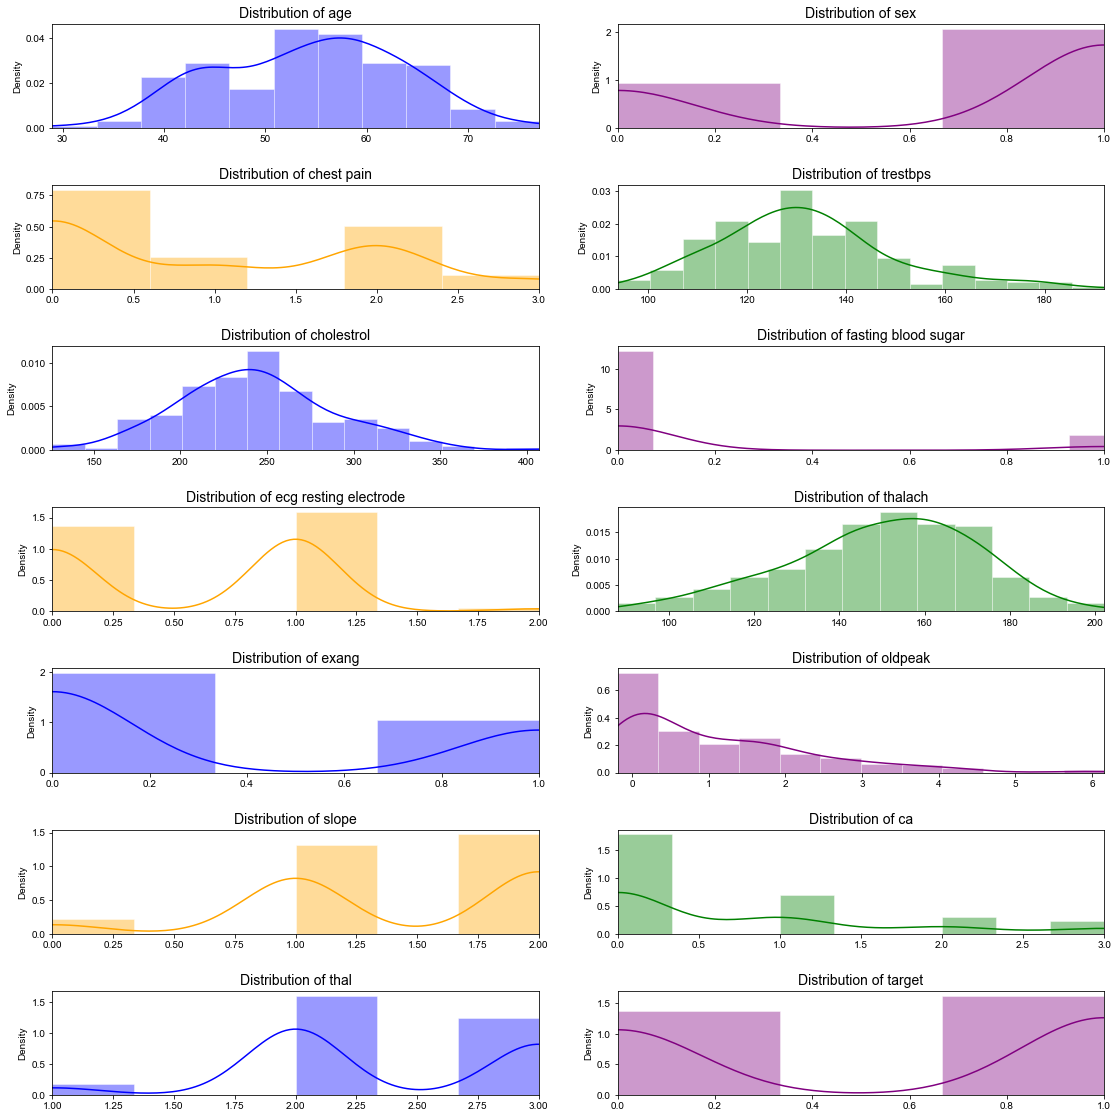

In [33]:
#histograms

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
n_bins = 12

fig, ax = plt.subplots(7, 2, figsize=(16,16))
age = df_heart_corr['age'].values
sex = df_heart_corr['sex'].values
cp = df_heart_corr['cp'].values
trestbps = df_heart_corr['trestbps'].values
chol = df_heart_corr['chol'].values
fbs = df_heart_corr['fbs'].values
restecg = df_heart_corr['restecg'].values
thalach = df_heart_corr['thalach'].values
exang = df_heart_corr['exang'].values
oldpeak = df_heart_corr['oldpeak'].values
slope = df_heart_corr['slope'].values
ca = df_heart_corr['ca'].values
thal = df_heart_corr['thal'].values
target = df_heart_corr['target'].values

sns.set(style="white", palette="PuBuGn_d", color_codes=True)

sns.distplot(age, ax=ax[0,0], color='blue')
ax[0,0].set_title('Distribution of age', fontsize=14)
ax[0,0].set_xlim([min(age), max(age)])
sns.distplot(sex, ax=ax[0,1], color='purple')
ax[0,1].set_title('Distribution of sex', fontsize=14)
ax[0,1].set_xlim([min(sex), max(sex)])

sns.distplot(cp, ax=ax[1,0], color='orange')
ax[1,0].set_title('Distribution of chest pain', fontsize=14)
ax[1,0].set_xlim([min(cp), max(cp)])
sns.distplot(trestbps, ax=ax[1,1], color='green')
ax[1,1].set_title('Distribution of trestbps', fontsize=14)
ax[1,1].set_xlim([min(trestbps), max(trestbps)])

sns.distplot(chol, ax=ax[2,0], color='blue')
ax[2,0].set_title('Distribution of cholestrol', fontsize=14)
ax[2,0].set_xlim([min(chol), max(chol)])
sns.distplot(fbs, ax=ax[2,1], color='purple')
ax[2,1].set_title('Distribution of fasting blood sugar', fontsize=14)
ax[2,1].set_xlim([min(fbs), max(fbs)])

sns.distplot(restecg,ax=ax[3,0], color='orange')
ax[3,0].set_title('Distribution of ecg resting electrode', fontsize=14)
ax[3,0].set_xlim([min(restecg), max(restecg)])
sns.distplot(thalach, ax=ax[3,1], color='green')
ax[3,1].set_title('Distribution of thalach', fontsize=14)
ax[3,1].set_xlim([min(thalach), max(thalach)])

sns.distplot(exang,ax=ax[4,0], color='blue')
ax[4,0].set_title('Distribution of exang', fontsize=14)
ax[4,0].set_xlim([min(exang), max(exang)])
sns.distplot(oldpeak, ax=ax[4,1], color='purple')
ax[4,1].set_title('Distribution of oldpeak', fontsize=14)
ax[4,1].set_xlim([min(oldpeak), max(oldpeak)])

sns.distplot(slope,ax=ax[5,0], color='orange')
ax[5,0].set_title('Distribution of slope', fontsize=14)
ax[5,0].set_xlim([min(slope), max(slope)])
sns.distplot(ca, ax=ax[5,1], color='green')
ax[5,1].set_title('Distribution of ca', fontsize=14)
ax[5,1].set_xlim([min(ca), max(ca)])

sns.distplot(thal,ax=ax[6,0], color='blue')
ax[6,0].set_title('Distribution of thal', fontsize=14)
ax[6,0].set_xlim([min(thal), max(thal)])
sns.distplot(target, ax=ax[6,1], color='purple')
ax[6,1].set_title('Distribution of target', fontsize=14)
ax[6,1].set_xlim([min(target), max(target)])

# adding some padding / spacing between subplots
fig.tight_layout(pad=2.0)

plt.show()

#### Correlation Matrix

In [34]:
#Correlation matrix
df_heart_corr.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.140074,-0.084230,0.332237,0.183099,0.050823,-0.115921,-0.383628,0.114545,0.138494,-0.123061,0.396850,0.049211,-0.196967
sex,-0.140074,1.000000,-0.057939,-0.047925,-0.191427,0.081750,-0.050550,0.015577,0.122773,0.113499,-0.054050,0.079135,0.215171,-0.249428
cp,-0.084230,-0.057939,1.000000,-0.009095,-0.061169,0.057205,0.044251,0.247421,-0.349369,-0.183320,0.154827,-0.242469,-0.164629,0.490819
trestbps,0.332237,-0.047925,-0.009095,1.000000,0.156400,0.137114,-0.103826,-0.100293,0.089479,0.165593,-0.134887,0.069480,0.038636,-0.120649
chol,0.183099,-0.191427,-0.061169,0.156400,1.000000,-0.025580,-0.076073,-0.047599,0.064076,0.047340,0.027633,0.112955,-0.013007,-0.079989
fbs,0.050823,0.081750,0.057205,0.137114,-0.025580,1.000000,-0.100736,0.035515,0.098474,-0.094036,-0.016944,0.113701,0.026077,-0.005276
restecg,-0.115921,-0.050550,0.044251,-0.103826,-0.076073,-0.100736,1.000000,0.030940,-0.043279,-0.058300,0.066008,-0.119991,-0.037175,0.105040
thalach,-0.383628,0.015577,0.247421,-0.100293,-0.047599,0.035515,0.030940,1.000000,-0.363643,-0.345290,0.463279,-0.252796,-0.154193,0.418411
exang,0.114545,0.122773,-0.349369,0.089479,0.064076,0.098474,-0.043279,-0.363643,1.000000,0.282243,-0.314293,0.128679,0.206719,-0.450321
oldpeak,0.138494,0.113499,-0.183320,0.165593,0.047340,-0.094036,-0.058300,-0.345290,0.282243,1.000000,-0.632808,0.286393,0.229689,-0.464140


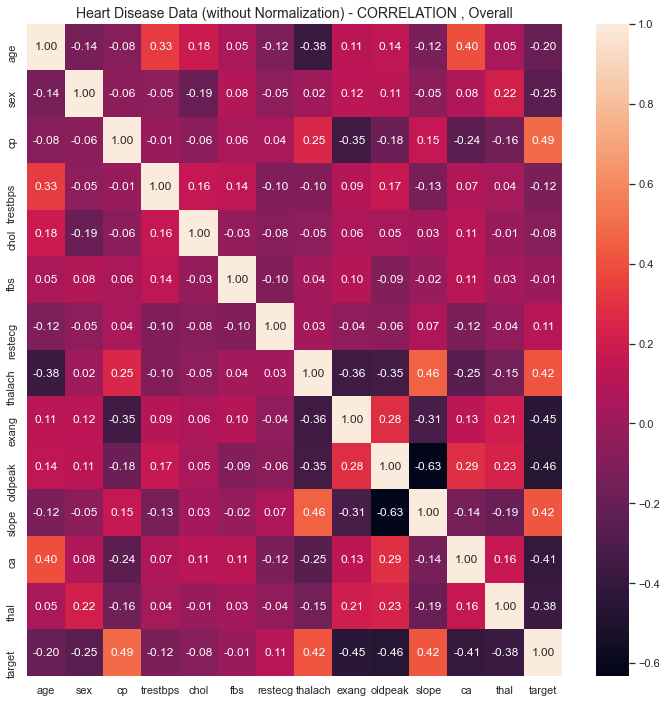

In [35]:
#Making a correlation matrix (heatmap) without normalization

corrmat = df_heart_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (12,12))
#plot the heatmap
plt.title('Heart Disease Data (without Normalization) - CORRELATION , Overall', fontsize=14)
p= sns.heatmap(df_heart_corr[top_corr_features].corr(), annot = True,fmt='.2f')

##### Observation: Of all the features, the following attributes had the highest correlation with the target: cp, thalach, slope, exang, oldpeak, ca and thal

<AxesSubplot:title={'center':'Heart Disease Normalized Data - CORRELATION, Overall'}>

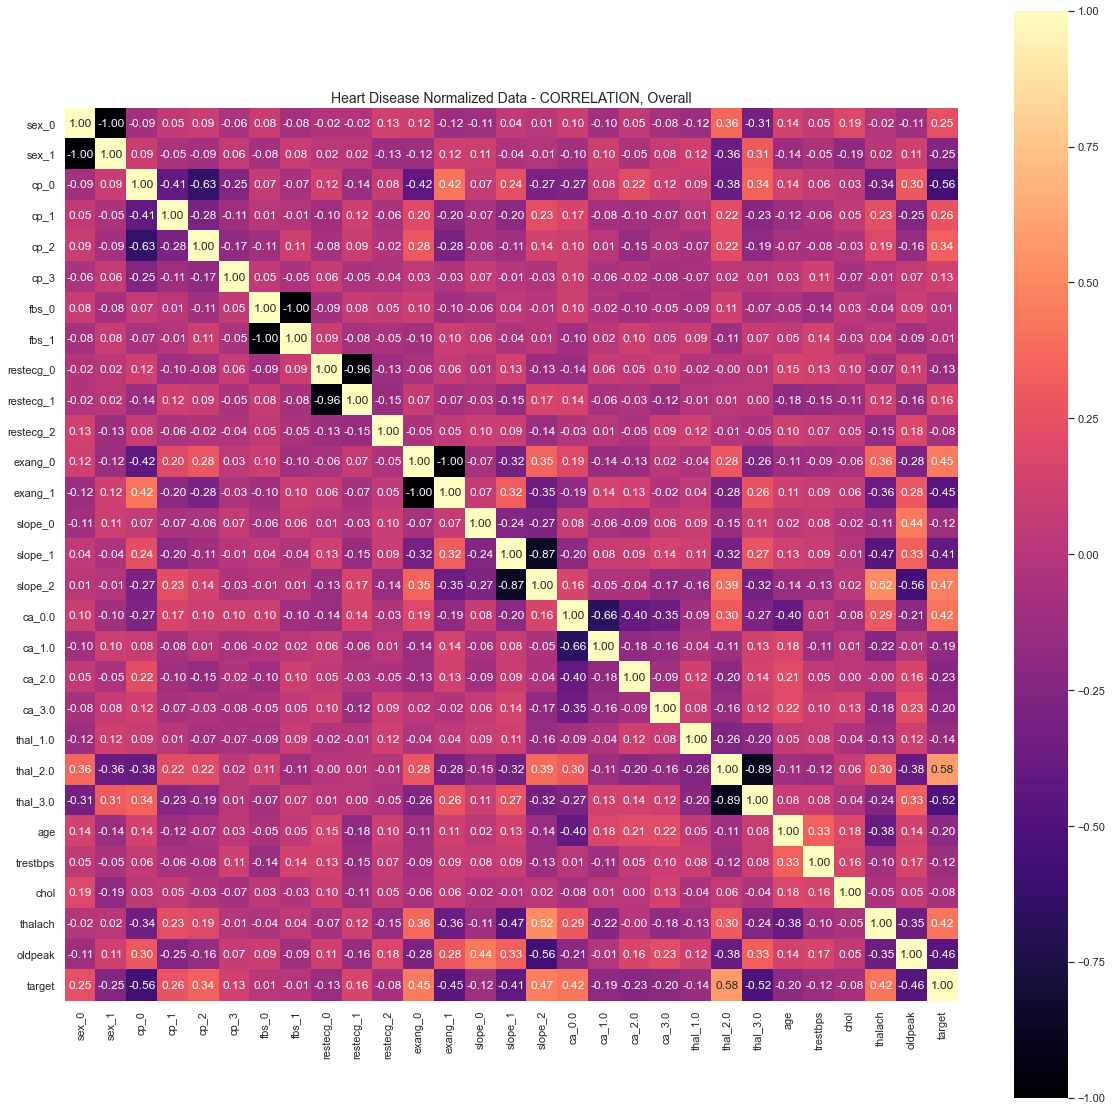

In [36]:
#Making a correlation matrix (heatmap) with normalization
CorrMat2 = df_nzd.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease Normalized Data - CORRELATION, Overall', fontsize=14)
sns.heatmap(CorrMat2, annot=True, square=True, cmap="magma",fmt='.2f')

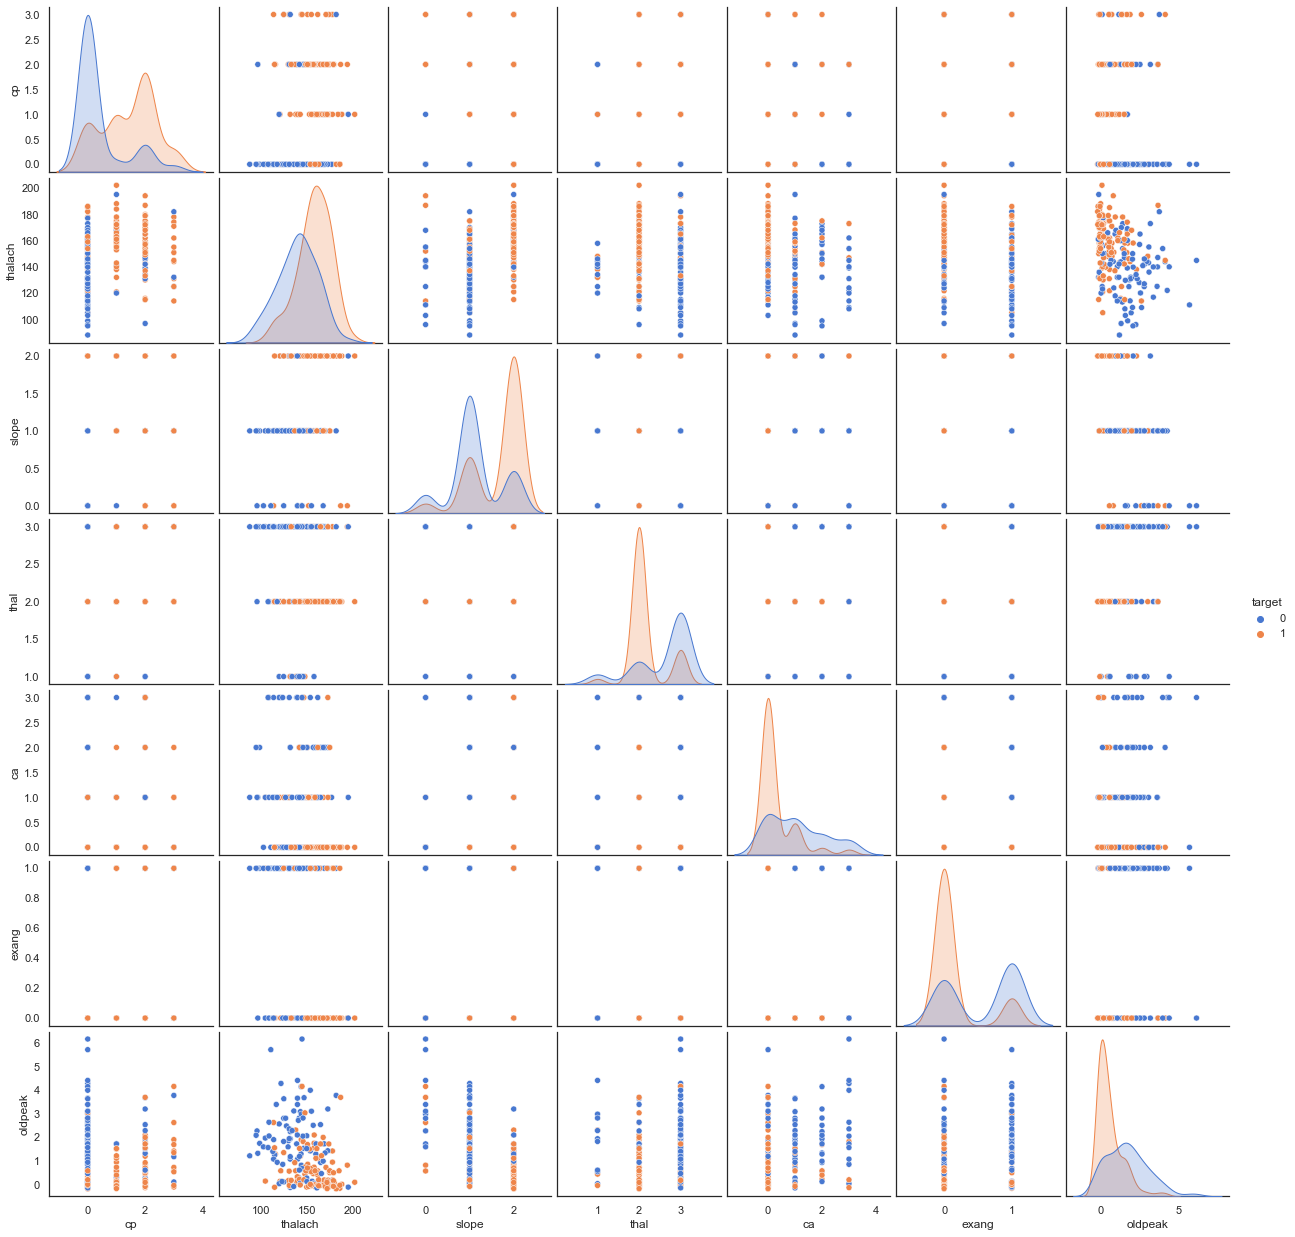

In [37]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
selected_features_pairplot = ['cp', 'thalach', 'slope', 'thal', 'ca', 'exang', 'oldpeak']
values_subset_pairplot = df_heart_corr[selected_features_pairplot]
pairplot_labels = df_heart_corr['target']

sns.pairplot(values_subset_pairplot.join(pairplot_labels), 
             hue='target', 
             vars=selected_features_pairplot)

#### Observations: 
##### 1. Deducing from the diagonal distribution plot, most of the people with 'ca' value of 0 have target value '0' i.e. no heart disease.
##### 2. Majority of the people with the heart disease have a slope of value '2' i.e. flat slope; and most of those without heart disease have a slope value of '1' i.e. upsloping.
##### 3. People with heart disease have attained the peak value of Thalium stress at a value of 1.
##### 4. People with heart disease have a peak value of the ca distribution at ca = 0 i.e. number of major vessels 0 colored by flourosopy.
##### 5. The peak distribution of people with heart disease is at exang value '0' i.e. exang: Exercise induced angina of value 0.


In [38]:
rows = []
for column in df_heart_corr:
     rows.append([column, df_heart_corr[column].mean(), df_heart_corr[column].var(), df_heart_corr[column].skew(), df_heart_corr[column].kurtosis()])

df_heart_stats = pd.DataFrame(rows, columns=["column","mean", "variance","skew","kurtosis"])
df_heart_stats

,column,mean,variance,skew,kurtosis
0,age,54.311321,83.637217,-0.106027,-0.561563
1,sex,0.688679,0.215416,-0.820789,-1.339028
2,cp,0.957547,1.045583,0.461438,-1.240674
3,trestbps,131.822226,315.412298,0.676997,0.716703
4,chol,244.148518,2055.467876,0.340569,0.413267
5,fbs,0.132075,0.115175,2.188903,2.817791
6,restecg,0.566038,0.284718,0.111397,-1.194129
7,thalach,149.721215,479.596816,-0.405718,-0.171905
8,exang,0.344340,0.226840,0.659880,-1.579550
9,oldpeak,1.098908,1.504838,1.271297,1.578970


# Training the model for Heart Disease Data

### Data Processing

In [870]:
df_heart_pros = pd.get_dummies(df_heart_corr, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [659]:
df_heart_pros

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1.0,thal_2.0,thal_3.0
0,76,140.102822,197.105970,115.952071,1.284822,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,43,132.079599,341.049462,135.970028,3.110483,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,47,107.899290,242.822816,152.210039,-0.023723,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
3,51,99.934001,240.825764,143.049207,1.195082,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,57,110.103508,334.952353,143.099327,3.082052,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,134.149785,256.189595,141.981335,0.606726,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
208,57,127.981407,302.985611,158.992132,0.577227,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
209,54,150.188534,232.117551,164.977674,1.715230,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
210,41,129.918793,214.008059,167.851493,1.992138,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [41]:
y = df_heart_pros['target']
X = df_heart_pros.drop(['target'], axis = 1)

In [42]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[columns_to_scale] = standardScaler.fit_transform(X[columns_to_scale])

In [43]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1.0,thal_2.0,thal_3.0
0,2.377169,0.467357,-1.040069,-1.545641,0.151913,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,-1.239767,0.014526,2.142394,-0.629403,1.643683,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,-0.801351,-1.350212,-0.029310,0.113916,-0.917316,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,-0.362934,-1.799773,-0.073463,-0.305383,0.078585,0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0.294690,-1.225806,2.007592,-0.303089,1.620452,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=98)

In [45]:
knnmodel=KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_predict = knnmodel.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
acc = "Accuracy: {:3.4%}".format(accuracy_score(y_test,y_predict))
acc

'Accuracy: 86.0465%'

In [48]:
from sklearn.metrics import roc_auc_score
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test, y_predict))
auc

'AUC Score: 86.4253%'

In [49]:
from sklearn.metrics import f1_score
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test, y_predict))
f1Score

'f1 Score: 88.0000%'

In [50]:
from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(y_test.values,y_predict)
conmat

array([[15,  2],
       [ 4, 22]])

The best accuracy was  0.9069767441860465 with k= 3


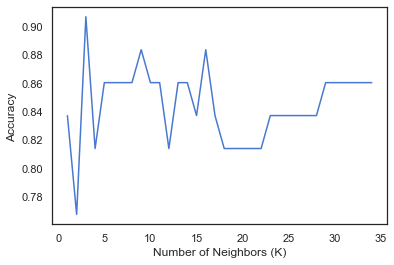

In [51]:
from sklearn.metrics import accuracy_score

a_index=list(range(1,35))
a=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    prediction=neigh.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
print( "The best accuracy was ", a.max(), "with k=", a.argmax()+1) 
plt.plot(a_index, a)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

### Train-validate-test

In [52]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.10)

In [53]:
knn1model=KNeighborsClassifier(n_neighbors = 5)
knn1model.fit(X_train1,y_train1)

KNeighborsClassifier()

In [54]:
y_predict1 = knn1model.predict(X_val1)

In [55]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val1,y_predict1)
acc

0.7058823529411765

In [56]:
from sklearn.metrics import confusion_matrix
conmat1=confusion_matrix(y_val1.values,y_predict1)
conmat1

array([[5, 4],
       [1, 7]])

The best accuracy was  0.8823529411764706 with k= 3


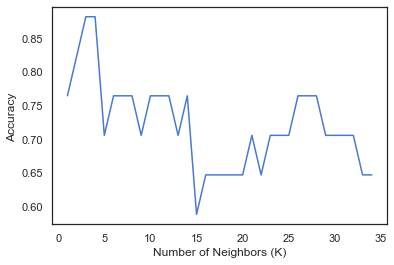

In [57]:
from sklearn.metrics import accuracy_score

b_index=list(range(1,35))
b=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh1=KNeighborsClassifier(n_neighbors=i).fit(X_train1,y_train1)
    prediction1=neigh1.predict(X_val1)
    b=b.append(pd.Series(accuracy_score(prediction1,y_val1)))
print( "The best accuracy was ", b.max(), "with k=", b.argmax()+1) 
plt.plot(b_index, b)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

The best accuracy was with 0.8823529411764706 with k= 3


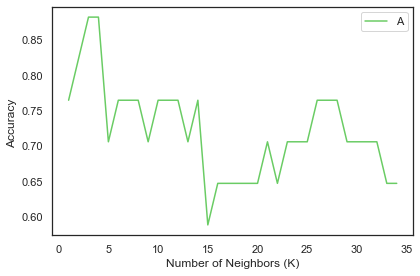

In [58]:
Ks=35
mean_accuracy1 =np.zeros((Ks-1))
for n in range(1,Ks):
    neigh2=KNeighborsClassifier(n_neighbors=n).fit(X_train1,y_train1)
    yhat1=neigh2.predict(X_val1)
    mean_accuracy1[n-1]=accuracy_score(y_val1,yhat1)
print( "The best accuracy was with", mean_accuracy1.max(), "with k=", mean_accuracy1.argmax()+1) 

plt.plot(range(1,Ks),mean_accuracy1,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [59]:
#print each cv score (accuracy) and average them

from sklearn.model_selection import cross_val_score

accuracy_rate = []

for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=5)
    accuracy_rate.append(score.mean())

print(score)
print("Accuracy: {:3.4%}".format(score.mean() ))
print("Variance:", score.var()*100)

[0.74418605 0.74418605 0.88095238 0.78571429 0.95238095]
Accuracy: 82.1484%
Variance: 0.6779984032552987


### Fitting the model on the entire training set and predicting the target on test set using the best found parameter

In [60]:
y1 = df_heart_pros['target']
X1 = df_heart_pros.drop(['target'], axis = 1)

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X1[columns_to_scale] = standardScaler.fit_transform(X1[columns_to_scale])

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X1, y1, test_size=0.2, random_state=98)

In [62]:
knn2model=KNeighborsClassifier(n_neighbors = 3)
knn2model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [63]:
y_predict2 = knn2model.predict(X_test2)

In [64]:
from sklearn.metrics import accuracy_score
acc = "Accuracy: {:3.4%}".format(accuracy_score(y_test2,y_predict2))
acc

'Accuracy: 90.6977%'

In [65]:
from sklearn.metrics import roc_auc_score
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test2, y_predict2))
auc

'AUC Score: 89.2534%'

In [66]:
from sklearn.metrics import f1_score
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test2, y_predict2))
f1Score

'f1 Score: 92.5926%'

# Improved Model

### Weighted KNN - Using Euclidean distance and weights = 'distance'

In [1106]:
#importing all the resources for preprocessing and creating pipeline
from sklearn import preprocessing

In [1107]:
df_heart_pros1 = pd.get_dummies(df_heart_corr, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [1108]:
y3 = df_heart_pros1['target']
X3 = df_heart_pros1.drop(['target'], axis = 1)

In [1109]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X3[columns_to_scale] = standardScaler.fit_transform(X3[columns_to_scale])

In [1110]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, y3, test_size=0.2, random_state=98)

In [1111]:
X_train3.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1.0,thal_2.0,thal_3.0
163,0.952315,-0.438565,-1.043354,-0.633654,-0.969532,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
155,-0.910955,-1.733606,-1.043446,0.283352,-0.904794,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
52,-0.362934,0.457566,1.217748,1.060194,0.267741,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
78,-0.472539,-1.226071,-0.073463,0.419944,-0.426271,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
44,-1.678184,-2.137273,-0.998293,1.341453,-0.768668,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [1112]:
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train3, y_train3, test_size=0.10, random_state=98)

In [1113]:
X_train4.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1.0,thal_2.0,thal_3.0
169,-1.897392,-0.094497,0.127610,1.698545,2.115747,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
32,-1.787788,-0.669165,-0.287469,1.475874,2.182410,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
136,1.719544,1.370524,-0.073463,-0.310852,-0.917123,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
173,0.404294,-0.211034,-0.621630,-0.857091,1.023524,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
15,0.075482,-0.204654,-0.868149,-0.898189,0.612430,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [1114]:
knn3model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean', weights='distance')
knn3model.fit(X_train4,y_train4)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [1115]:
y_predict3 = knn3model.predict(X_val4)

In [1116]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_val4,y_predict3)
acc2

0.7647058823529411

In [1117]:
from sklearn.metrics import confusion_matrix
conmat2=confusion_matrix(y_val4.values,y_predict3)
conmat2

array([[7, 2],
       [2, 6]])

The best accuracy was  0.8235294117647058 with k= 4


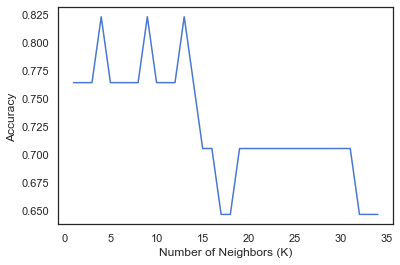

In [1118]:
from sklearn.metrics import accuracy_score

c_index=list(range(1,35))
c=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh3=KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance').fit(X_train4,y_train4)
    prediction3=neigh3.predict(X_val4)
    c=c.append(pd.Series(accuracy_score(prediction3,y_val4)))
print( "The best accuracy was ", c.max(), "with k=", c.argmax()+1) 
plt.plot(c_index, c)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [1119]:
#Fitting the weighted KNN (Euclidean distance) model with k=4 
knn4model=KNeighborsClassifier(n_neighbors = 4,metric='euclidean', weights='distance')
knn4model.fit(X_train3,y_train3)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [1120]:
y_predict_Euclidean = knn4model.predict(X_test3)

In [1121]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc3 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_Euclidean))
acc3

'Accuracy: 88.3721%'

In [1122]:
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test3, y_predict_Euclidean))
auc

'AUC Score: 87.3303%'

In [1123]:
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test3, y_predict_Euclidean))
f1Score

'f1 Score: 90.5660%'

### Weighted KNN - Using Manhatten distance and weights = 'distance'

In [1124]:
knn5model=KNeighborsClassifier(n_neighbors = 5,metric='manhattan', weights='distance')
knn5model.fit(X_train4,y_train4)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [1125]:
y_predict4 = knn5model.predict(X_val4)

In [1126]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_val4,y_predict4)
acc3

0.8235294117647058

In [1127]:
from sklearn.metrics import confusion_matrix
conmat3=confusion_matrix(y_val4.values,y_predict4)
conmat3

array([[7, 2],
       [1, 7]])

The best accuracy was  0.8823529411764706 with k= 3


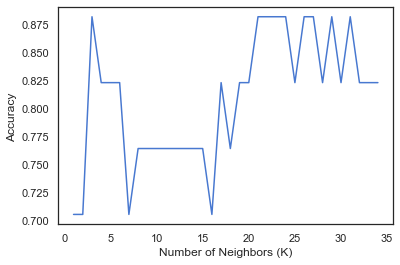

In [1128]:
from sklearn.metrics import accuracy_score

d_index=list(range(1,35))
d=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh4=KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance').fit(X_train4,y_train4)
    prediction4=neigh4.predict(X_val4)
    d=d.append(pd.Series(accuracy_score(prediction4,y_val4)))
print( "The best accuracy was ", d.max(), "with k=", d.argmax()+1) 
plt.plot(d_index, d)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [1129]:
#Fitting the weighted KNN (Manhattan distance) model with k=3 
knn6model=KNeighborsClassifier(n_neighbors = 3,metric='manhattan', weights='distance')
knn6model.fit(X_train3,y_train3)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [1130]:
y_predict_Manhattan = knn6model.predict(X_test3)

In [1131]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc4 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_Manhattan))
acc4

'Accuracy: 90.6977%'

In [1132]:
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test3, y_predict_Manhattan))
auc

'AUC Score: 91.2896%'

In [1133]:
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test3, y_predict_Manhattan))
f1Score

'f1 Score: 92.0000%'

### Using different NN Algorithms

#### Ball Tree Algorithm for KNN Model

In [1134]:
#Using Ball Tree algorithm in KNN Model
knn7model=KNeighborsClassifier(n_neighbors = 5,metric='minkowski', algorithm = 'ball_tree', weights = 'uniform', p = 1)
knn7model.fit(X_train4,y_train4)

KNeighborsClassifier(algorithm='ball_tree', p=1)

In [1135]:
y_predict5 = knn7model.predict(X_val4)

In [1136]:
from sklearn.metrics import accuracy_score
acc5 = accuracy_score(y_val4,y_predict5)
acc5

0.8235294117647058

In [1137]:
from sklearn.metrics import confusion_matrix
conmat4=confusion_matrix(y_val4.values,y_predict5)
conmat4

array([[7, 2],
       [1, 7]])

The best accuracy was  0.8235294117647058 with k= 9


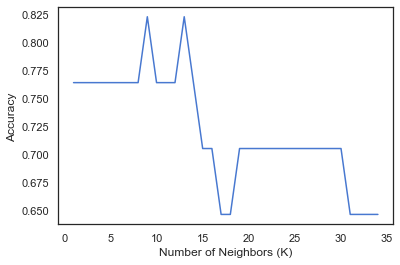

In [1138]:
from sklearn.metrics import accuracy_score

e_index=list(range(1,35))
e=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh5=KNeighborsClassifier(n_neighbors=i, metric='minkowski', algorithm = 'ball_tree').fit(X_train4,y_train4)
    prediction5=neigh5.predict(X_val4)
    e=e.append(pd.Series(accuracy_score(prediction5,y_val4)))
print( "The best accuracy was ", e.max(), "with k=", e.argmax()+1) 
plt.plot(e_index, e)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [1139]:
#Fitting the weighted KNN (Ball Tree algorithm) model with k=9 
knn8model=KNeighborsClassifier(n_neighbors = 9,metric='minkowski', algorithm = 'ball_tree')
knn8model.fit(X_train3,y_train3)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

In [1140]:
y_predict_BallTree = knn8model.predict(X_test3)

In [1141]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc6 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_BallTree))
acc6

'Accuracy: 88.3721%'

In [1142]:
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test3, y_predict_BallTree))
auc

'AUC Score: 88.3484%'

In [1143]:
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test3, y_predict_BallTree))
f1Score

'f1 Score: 90.1961%'

#### KDTree Algorithm for KNN Model

In [1144]:
#Using Kd Tree algorithm in KNN Model
knn9model=KNeighborsClassifier(n_neighbors = 5,metric='minkowski', algorithm = 'kd_tree')
knn9model.fit(X_train4,y_train4)

KNeighborsClassifier(algorithm='kd_tree')

In [1145]:
y_predict6 = knn9model.predict(X_val4)

In [1146]:
from sklearn.metrics import accuracy_score
acc7 = accuracy_score(y_val4,y_predict6)
acc7

0.7647058823529411

In [1147]:
from sklearn.metrics import confusion_matrix
conmat5=confusion_matrix(y_val4.values,y_predict6)
conmat5

array([[7, 2],
       [2, 6]])

The best accuracy was  0.8235294117647058 with k= 9


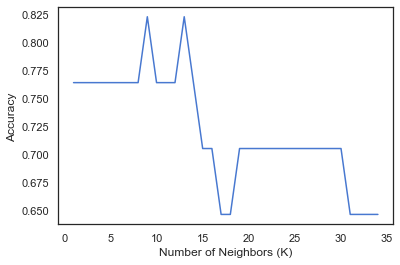

In [1148]:
from sklearn.metrics import accuracy_score

f_index=list(range(1,35))
f=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh6=KNeighborsClassifier(n_neighbors=i, metric='minkowski', algorithm = 'kd_tree').fit(X_train4,y_train4)
    prediction6=neigh6.predict(X_val4)
    f=f.append(pd.Series(accuracy_score(prediction6,y_val4)))
print( "The best accuracy was ", f.max(), "with k=", f.argmax()+1) 
plt.plot(f_index, f)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [1149]:
#Fitting the weighted KNN (Ball Tree algorithm) model with k=9
knn_10model=KNeighborsClassifier(n_neighbors = 9,metric='minkowski', algorithm = 'kd_tree')
knn_10model.fit(X_train3,y_train3)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)

In [1150]:
y_predict_KDTree = knn_10model.predict(X_test3)

In [1151]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc8 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_KDTree))
acc8

'Accuracy: 88.3721%'

In [1152]:
auc = "AUC Score: {:3.4%}".format(roc_auc_score(y_test3, y_predict_KDTree))
auc

'AUC Score: 88.3484%'

In [1153]:
f1Score = "f1 Score: {:3.4%}".format(f1_score(y_test3, y_predict_KDTree))
f1Score

'f1 Score: 90.1961%'